In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vR7cOF5NSArcxNxYjzDjjTnFNmG-l0zM8WqabuCqNmwKke7VTEMKjR1BamqigAFeRCvbhCylaspQpTG/pub?gid=0&single=true&output=csv'
approval = pd.read_csv(url)
approval

issue                             pollster  start_date  \
0           economy                                Ipsos  03/31/2025   
1           economy                               YouGov  04/05/2025   
2           economy                               YouGov  03/27/2025   
3           economy          Harris Insights & Analytics  03/26/2025   
4           economy                        J.L. Partners  03/25/2025   
...             ...                                  ...         ...   
1047  trade_tariffs  Beacon Research/Shaw & Co. Research  09/06/2025   
1048      inflation  Beacon Research/Shaw & Co. Research  09/06/2025   
1049    immigration                      Morning Consult  09/06/2025   
1050        economy                      Morning Consult  09/06/2025   
1051  trade_tariffs                      Morning Consult  09/06/2025   

        end_date  sample_size population  approve  disapprove   net  \
0     04/02/2025         1486          A     37.0        52.0 -15.0   
1     04/08/2025         1741          A     41.0        51.0 -10.0   
2     03/28/2025         2609          A     48.0        52.0  -4.0   
3     03/27/2025         2746         RV     45.0        55.0 -10.0   
4     03/27/2025         1001         RV     45.0        55.0 -10.0   
...          ...          ...        ...      ...         ...   ...   
1047  09/09/2025         1004         RV     36.0        63.0 -27.0   
1048  09/09/2025         1004         RV     32.0        67.0 -35.0   
1049  09/08/2025         2201         RV     49.0        42.0   7.0   
1050  09/08/2025         2201         RV     42.0        50.0  -8.0   
1051  09/08/2025         2201         RV     42.0        47.0  -5.0   

                                                    url        sponsor  
0     https://www.ipsos.com/sites/default/files/ct/n...        Reuters  
1     https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist  
2     https://www.cbsnews.com/news/opinion-poll-trum...       CBS News  
3     https://harvardharrispoll.com/wp-content/uploa...   Harvard CAPS  
4     https://www.dailymail.co.uk/news/article-14547...     Daily Mail  
...                                                 ...            ...  
1047  https://static.foxnews.com/foxnews.com/content...       FOX News  
1048  https://static.foxnews.com/foxnews.com/content...       FOX News  
1049  https://pro.morningconsult.com/trackers/donald...            NaN  
1050  https://pro.morningconsult.com/trackers/donald...            NaN  
1051  https://pro.morningconsult.com/trackers/donald...            NaN  

[1052 rows x 11 columns]

In [4]:
approval.to_csv('president-issue-approval-polling.csv')

In [5]:
approval[approval['issue']=='economy'].shape

(167, 11)

In [6]:
approval['sponsor'] = approval['sponsor'].fillna('na')

In [7]:
approval

issue                             pollster  start_date  \
0           economy                                Ipsos  03/31/2025   
1           economy                               YouGov  04/05/2025   
2           economy                               YouGov  03/27/2025   
3           economy          Harris Insights & Analytics  03/26/2025   
4           economy                        J.L. Partners  03/25/2025   
...             ...                                  ...         ...   
1047  trade_tariffs  Beacon Research/Shaw & Co. Research  09/06/2025   
1048      inflation  Beacon Research/Shaw & Co. Research  09/06/2025   
1049    immigration                      Morning Consult  09/06/2025   
1050        economy                      Morning Consult  09/06/2025   
1051  trade_tariffs                      Morning Consult  09/06/2025   

        end_date  sample_size population  approve  disapprove   net  \
0     04/02/2025         1486          A     37.0        52.0 -15.0   
1     04/08/2025         1741          A     41.0        51.0 -10.0   
2     03/28/2025         2609          A     48.0        52.0  -4.0   
3     03/27/2025         2746         RV     45.0        55.0 -10.0   
4     03/27/2025         1001         RV     45.0        55.0 -10.0   
...          ...          ...        ...      ...         ...   ...   
1047  09/09/2025         1004         RV     36.0        63.0 -27.0   
1048  09/09/2025         1004         RV     32.0        67.0 -35.0   
1049  09/08/2025         2201         RV     49.0        42.0   7.0   
1050  09/08/2025         2201         RV     42.0        50.0  -8.0   
1051  09/08/2025         2201         RV     42.0        47.0  -5.0   

                                                    url        sponsor  
0     https://www.ipsos.com/sites/default/files/ct/n...        Reuters  
1     https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist  
2     https://www.cbsnews.com/news/opinion-poll-trum...       CBS News  
3     https://harvardharrispoll.com/wp-content/uploa...   Harvard CAPS  
4     https://www.dailymail.co.uk/news/article-14547...     Daily Mail  
...                                                 ...            ...  
1047  https://static.foxnews.com/foxnews.com/content...       FOX News  
1048  https://static.foxnews.com/foxnews.com/content...       FOX News  
1049  https://pro.morningconsult.com/trackers/donald...             na  
1050  https://pro.morningconsult.com/trackers/donald...             na  
1051  https://pro.morningconsult.com/trackers/donald...             na  

[1052 rows x 11 columns]

In [8]:
ratings = pd.read_csv('pollster_ratings_silver.csv')
ratings

Pollster    Grade  Predictive Plus-Minus  \
0                          AtlasIntel    A+@@1              -0.957740   
1     Marquette University Law School   A/B@@4              -0.920261   
2                 The Washington Post    A+@@1              -0.902281   
3             Research & Polling Inc.     A@@2              -0.871136   
4    The New York Times/Siena College     A@@2              -0.763947   
..                                ...      ...                    ...   
530          Nielson Brothers Polling  C/D@@12               1.946864   
531                     Ascend Action  C/D@@12               2.282717   
532       Jayhawk Consulting Services  C/D@@12               2.353968   
533        Fort Hays State University  C/D@@12               2.489170   
534                The Dartmouth Poll  C/D@@12               3.988291   

      Mean-reverted bias  Number of polls cat  
0     D+0.16@@0.16334188               91  D+  
1     D+0.32@@0.31545374               17  D+  
2     D+0.90@@0.89811021               98  D+  
3    R+0.55@@-0.54944503               44  R+  
4      D+1.41@@1.4121077              116  D+  
..                   ...              ...  ..  
530    D+3.05@@3.0515239               11  D+  
531    D+3.35@@3.3485439                6  D+  
532    D+2.27@@2.2674108                2  D+  
533   R+1.10@@-1.0960908                6  R+  
534    D+4.40@@4.4045453                4  D+  

[535 rows x 6 columns]

In [9]:
ratings[ratings['Pollster']=='Hart Research Associates/Public Opinion Strategies']

Pollster  Grade  \
31  Hart Research Associates/Public Opinion Strate...  B+@@5   

    Predictive Plus-Minus  Mean-reverted bias  Number of polls cat  
31              -0.250934  D+0.85@@0.85034752               37  D+

In [10]:
approval[approval['pollster']=='Hart Research Associates/Public Opinion Strategies']

issue                                           pollster  \
12             economy  Hart Research Associates/Public Opinion Strate...   
37         immigration  Hart Research Associates/Public Opinion Strate...   
61           inflation  Hart Research Associates/Public Opinion Strate...   
76      foreign_policy  Hart Research Associates/Public Opinion Strate...   
119            economy  Hart Research Associates/Public Opinion Strate...   
120     foreign_policy  Hart Research Associates/Public Opinion Strate...   
121          inflation  Hart Research Associates/Public Opinion Strate...   
236      trade_tariffs  Hart Research Associates/Public Opinion Strate...   
690            ukraine  Hart Research Associates/Public Opinion Strate...   
691    border_security  Hart Research Associates/Public Opinion Strate...   
692      govt_spending  Hart Research Associates/Public Opinion Strate...   
693  federal_workforce  Hart Research Associates/Public Opinion Strate...   
694       deportations  Hart Research Associates/Public Opinion Strate...   
890            economy  Hart Research Associates/Public Opinion Strate...   
891    border_security  Hart Research Associates/Public Opinion Strate...   
892       deportations  Hart Research Associates/Public Opinion Strate...   
893      trade_tariffs  Hart Research Associates/Public Opinion Strate...   
894     foreign_policy  Hart Research Associates/Public Opinion Strate...   
895              taxes  Hart Research Associates/Public Opinion Strate...   
896      govt_spending  Hart Research Associates/Public Opinion Strate...   
897          inflation  Hart Research Associates/Public Opinion Strate...   

     start_date    end_date  sample_size population  approve  disapprove  \
12   03/07/2025  03/11/2025         1000         RV     44.0        54.0   
37   03/07/2025  03/11/2025         1000         RV     55.0        43.0   
61   03/07/2025  03/11/2025         1000         RV     42.0        55.0   
76   03/07/2025  03/11/2025         1000         RV     45.0        53.0   
119  04/09/2025  04/13/2025         1000          A     45.0        51.0   
120  04/09/2025  04/13/2025         1000          A     42.0        53.0   
121  04/09/2025  04/13/2025         1000          A     37.0        60.0   
236  04/09/2025  04/13/2025         1000          A     41.0        57.0   
690  03/07/2025  03/11/2025         1000         RV     42.0        55.0   
691  04/09/2025  04/13/2025         1000          A     53.0        41.0   
692  04/09/2025  04/13/2025         1000          A     45.0        51.0   
693  04/09/2025  04/13/2025         1000          A     44.0        53.0   
694  04/09/2025  04/13/2025         1000          A     52.0        45.0   
890  07/29/2025  08/03/2025         1000          A     45.0        53.0   
891  07/29/2025  08/03/2025         1000          A     53.0        44.0   
892  07/29/2025  08/03/2025         1000          A     49.0        49.0   
893  07/29/2025  08/03/2025         1000          A     45.0        51.0   
894  07/29/2025  08/03/2025         1000          A     41.0        55.0   
895  07/29/2025  08/03/2025         1000          A     40.0        53.0   
896  07/29/2025  08/03/2025         1000          A     39.0        58.0   
897  07/29/2025  08/03/2025         1000          A     37.0        60.0   

      net                                                url   sponsor  
12  -10.0  https://www.nbcnews.com/politics/trump-adminis...  NBC News  
37   12.0  https://www.nbcnews.com/politics/trump-adminis...  NBC News  
61  -13.0  https://www.nbcnews.com/politics/trump-adminis...  NBC News  
76   -8.0  https://www.nbcnews.com/politics/trump-adminis...  NBC News  
119  -6.0  https://www.realclearpolitics.com/docs/2025/25...      CNBC  
120 -11.0  https://www.realclearpolitics.com/docs/2025/25...      CNBC  
121 -23.0  https://www.realclearpolitics.com/docs/2025/25...      CNBC  
236 -16.0  https://fm.cnbc.com/applications/cnbc.com/reso...     

In [11]:
banned_pollsters = ratings[ratings['Grade'].str.contains('F')]['Pollster'].values
banned_pollsters

array(['Strategic Vision LLC', 'Pharos Research Group', 'Research 2000',
       'Big Data Poll', 'Overtime Politics', 'Rethink Priorities',
       'Blumenthal Research Daily', 'CSP Polling', 'KG Polling',
       'OurProgress (The Progress Campaign)', 'TCJ Research'],
      dtype=object)

In [12]:
approval = approval[~approval['pollster'].isin(banned_pollsters)]
approval.shape

(1052, 11)

In [13]:
approval['pollster'].value_counts()

pollster
YouGov                                                320
Ipsos                                                 135
Morning Consult                                        75
AtlasIntel                                             52
Quinnipiac University                                  50
Verasight                                              45
Harris Insights & Analytics                            36
Echelon Insights                                       29
Beacon Research/Shaw & Co. Research                    29
Gallup                                                 26
RMG Research                                           26
SSRS                                                   23
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
AP-NORC                                                19
Clarity Campaign Labs                                  16
Emerson College                                        15
John 

In [14]:
approval = pd.merge(left=approval, right=ratings[['Pollster', 'Predictive Plus-Minus']], left_on='pollster',
                   right_on='Pollster', how='left')
approval

issue                             pollster  start_date  \
0           economy                                Ipsos  03/31/2025   
1           economy                               YouGov  04/05/2025   
2           economy                               YouGov  03/27/2025   
3           economy          Harris Insights & Analytics  03/26/2025   
4           economy                        J.L. Partners  03/25/2025   
...             ...                                  ...         ...   
1047  trade_tariffs  Beacon Research/Shaw & Co. Research  09/06/2025   
1048      inflation  Beacon Research/Shaw & Co. Research  09/06/2025   
1049    immigration                      Morning Consult  09/06/2025   
1050        economy                      Morning Consult  09/06/2025   
1051  trade_tariffs                      Morning Consult  09/06/2025   

        end_date  sample_size population  approve  disapprove   net  \
0     04/02/2025         1486          A     37.0        52.0 -15.0   
1     04/08/2025         1741          A     41.0        51.0 -10.0   
2     03/28/2025         2609          A     48.0        52.0  -4.0   
3     03/27/2025         2746         RV     45.0        55.0 -10.0   
4     03/27/2025         1001         RV     45.0        55.0 -10.0   
...          ...          ...        ...      ...         ...   ...   
1047  09/09/2025         1004         RV     36.0        63.0 -27.0   
1048  09/09/2025         1004         RV     32.0        67.0 -35.0   
1049  09/08/2025         2201         RV     49.0        42.0   7.0   
1050  09/08/2025         2201         RV     42.0        50.0  -8.0   
1051  09/08/2025         2201         RV     42.0        47.0  -5.0   

                                                    url        sponsor  \
0     https://www.ipsos.com/sites/default/files/ct/n...        Reuters   
1     https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist   
2     https://www.cbsnews.com/news/opinion-poll-trum...       CBS News   
3     https://harvardharrispoll.com/wp-content/uploa...   Harvard CAPS   
4     https://www.dailymail.co.uk/news/article-14547...     Daily Mail   
...                                                 ...            ...   
1047  https://static.foxnews.com/foxnews.com/content...       FOX News   
1048  https://static.foxnews.com/foxnews.com/content...       FOX News   
1049  https://pro.morningconsult.com/trackers/donald...             na   
1050  https://pro.morningconsult.com/trackers/donald...             na   
1051  https://pro.morningconsult.com/trackers/donald...             na   

                                 Pollster  Predictive Plus-Minus  
0                                   Ipsos               0.442898  
1                                  YouGov               0.047635  
2                                  YouGov               0.047635  
3             Harris Insights & Analytics               0.162447  
4                           J.L. Partners               0.197911  
...                                   ...                    ...  
1047  Beacon Research/Shaw & Co. Research              -0.635562  
1048  Beacon Research/Shaw & Co. Research              -0.635562  
1049                      Morning Consult               0.584994  
1050                      Morning Consult               0.584994  
1051                      Morning Consult               0.584994  

[1052 rows x 13 columns]

In [15]:
approval['pollster'].value_counts()

pollster
YouGov                                                320
Ipsos                                                 135
Morning Consult                                        75
AtlasIntel                                             52
Quinnipiac University                                  50
Verasight                                              45
Harris Insights & Analytics                            36
Echelon Insights                                       29
Beacon Research/Shaw & Co. Research                    29
Gallup                                                 26
RMG Research                                           26
SSRS                                                   23
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
AP-NORC                                                19
Clarity Campaign Labs                                  16
Emerson College                                        15
John 

In [16]:
auxiliary = pd.read_csv('auxiliary_pollster_rating_stats.csv')
auxiliary

Pollster  Correct calls       Outside MoE  \
0                           AtlasIntel       0.840659   8.8%@@91.208791   
1                  The Washington Post       0.693878   6.1%@@93.877551   
2              Research & Polling Inc.       0.886364  9.1%@@90.9090906   
3     The New York Times/Siena College       0.737069  18.1%@@81.896552   
4                               Cygnal       0.939655  13.8%@@86.206897   
..                                 ...            ...               ...   
93                    Digital Research       0.904762  38.1%@@61.904761   
94  Mitchell Research & Communications       0.695122    39%@@60.975611   
95                Merriman River Group       0.840000    60%@@39.999998   
96             McLaughlin & Associates       0.689655  34.5%@@65.517241   
97                        TCJ Research       0.590909  49.2%@@50.757575   

           House effect             ADPA  Herding penalty  herd_cat p_cat  
0    R+2.00@@-1.9990723   3.7@@3.6687982         0.096047         2    R+  
1     D+1.02@@1.0173736   3.6@@3.5756676         0.221841         3    D+  
2    D+0.63@@0.63289553    4.6@@4.642076         0.286276         3    D+  
3    D+0.79@@0.79133403   3.2@@3.2483816         0.280332         3    D+  
4   R+0.60@@-0.59704119   3.5@@3.4644768         0.521310         4    R+  
..                  ...              ...              ...       ...   ...  
93   R+2.44@@-2.4431372  11.4@@11.413808         0.000000         1    R+  
94  R+0.45@@-0.44617203   4.4@@4.4410443         0.229193         3    R+  
95   R+3.23@@-3.2347174  10.3@@10.260222         0.000000         1    R+  
96   R+4.94@@-4.9392128     6.2@@6.17804         0.000000         1    R+  
97   R+3.42@@-3.4232018   4.4@@4.3859954         0.000000         1    R+  

[98 rows x 8 columns]

In [17]:
# house_eff = auxiliary['House effect'].str.extract(r'(\w)\+(\d\.\d\d)@@*.')
house_eff = auxiliary['House effect'].str.extract(r'(\w)\+\d.\d\d.*@@([\d\.\+\-]+)')
house_eff[1] = house_eff[1].astype(float)
house_eff

0         1
0   R -1.999072
1   D  1.017374
2   D  0.632896
3   D  0.791334
4   R -0.597041
.. ..       ...
93  R -2.443137
94  R -0.446172
95  R -3.234717
96  R -4.939213
97  R -3.423202

[98 rows x 2 columns]

In [18]:
# R --> -1, D --> 1
house_eff[0] = house_eff[0].replace({'R':-1, 'D':1})
house_eff['house_effect'] = house_eff[1]
house_eff

0         1  house_effect
0  -1 -1.999072     -1.999072
1   1  1.017374      1.017374
2   1  0.632896      0.632896
3   1  0.791334      0.791334
4  -1 -0.597041     -0.597041
.. ..       ...           ...
93 -1 -2.443137     -2.443137
94 -1 -0.446172     -0.446172
95 -1 -3.234717     -3.234717
96 -1 -4.939213     -4.939213
97 -1 -3.423202     -3.423202

[98 rows x 3 columns]

In [19]:
auxiliary['house_effect'] = house_eff['house_effect']
auxiliary = auxiliary.set_index(['Pollster'])
auxiliary

Correct calls       Outside MoE  \
Pollster                                                              
AtlasIntel                               0.840659   8.8%@@91.208791   
The Washington Post                      0.693878   6.1%@@93.877551   
Research & Polling Inc.                  0.886364  9.1%@@90.9090906   
The New York Times/Siena College         0.737069  18.1%@@81.896552   
Cygnal                                   0.939655  13.8%@@86.206897   
...                                           ...               ...   
Digital Research                         0.904762  38.1%@@61.904761   
Mitchell Research & Communications       0.695122    39%@@60.975611   
Merriman River Group                     0.840000    60%@@39.999998   
McLaughlin & Associates                  0.689655  34.5%@@65.517241   
TCJ Research                             0.590909  49.2%@@50.757575   

                                           House effect             ADPA  \
Pollster                                                                   
AtlasIntel                           R+2.00@@-1.9990723   3.7@@3.6687982   
The Washington Post                   D+1.02@@1.0173736   3.6@@3.5756676   
Research & Polling Inc.              D+0.63@@0.63289553    4.6@@4.642076   
The New York Times/Siena College     D+0.79@@0.79133403   3.2@@3.2483816   
Cygnal                              R+0.60@@-0.59704119   3.5@@3.4644768   
...                                                 ...              ...   
Digital Research                     R+2.44@@-2.4431372  11.4@@11.413808   
Mitchell Research & Communications  R+0.45@@-0.44617203   4.4@@4.4410443   
Merriman River Group                 R+3.23@@-3.2347174  10.3@@10.260222   
McLaughlin & Associates              R+4.94@@-4.9392128     6.2@@6.17804   
TCJ Research                         R+3.42@@-3.4232018   4.4@@4.3859954   

                                    Herding penalty  herd_cat p_cat  \
Pollster                                                              
AtlasIntel                                 0.096047         2    R+   
The Washington Post                        0.221841         3    D+   
Research & Polling Inc.                    0.286276         3    D+   
The New York Times/Siena College           0.280332         3    D+   
Cygnal                                     0.521310         4    R+   
...                                             ...       ...   ...   
Digital Research                           0.000000         1    R+   
Mitchell Research & Communications         0.229193         3    R+   
Merriman River Group                       0.000000         1    R+   
McLaughlin & Associates                    0.000000         1    R+   
TCJ Research                               0.000000         1    R+   

                                    house_effect  
Pollster                                          
AtlasIntel                             -1.999072  
The Washington Post                     1.017374  
Research & Polling Inc.                 0.632896  
The New York Times/Siena College        0.791334  
Cygnal                                 -0.597041  
...                                          ...  
Digital Research                       -2.443137  
Mitchell Research & Communications     -0.446172  
Merriman River Group                   -3.234717  
McLaughlin & Associates                -4.939213  
TCJ Research                           -3.423202  

[98 rows x 8 columns]

In [20]:
def apply_house_eff(data, pollster):
    df = data[data['pollster']==pollster]
    try:
        df['approve_adj'] = df['approve'] + (auxiliary.loc[pollster, 'house_effect'] / 2)
        df['disapprove_adj'] = df['disapprove'] - (auxiliary.loc[pollster, 'house_effect'] / 2)
    except KeyError:
        df['approve_adj'] = df['approve']
        df['disapprove_adj'] = df['disapprove']
    return df

In [21]:
pollsters = approval['pollster'].value_counts().index.values
df_adjs = []
for p in pollsters:
    df = apply_house_eff(approval, p)
    df_adjs.append(df)

approval_adj = pd.concat(df_adjs, axis=0)
approval_adj

issue                 pollster  start_date    end_date  \
1           economy                   YouGov  04/05/2025  04/08/2025   
2           economy                   YouGov  03/27/2025  03/28/2025   
5           economy                   YouGov  04/13/2025  04/15/2025   
6           economy                   YouGov  04/13/2025  04/15/2025   
10          economy                   YouGov  04/19/2025  04/22/2025   
..              ...                      ...         ...         ...   
434       inflation          The Tyson Group  06/25/2025  06/26/2025   
435  foreign_policy          The Tyson Group  06/25/2025  06/26/2025   
148         economy   OH Predictive Insights  04/15/2025  04/18/2025   
347     immigration      The Washington Post  06/10/2025  06/10/2025   
856   epstein_files  McLaughlin & Associates  07/21/2025  07/24/2025   

     sample_size population  approve  disapprove   net  \
1           1741          A     41.0        51.0 -10.0   
2           2609          A     48.0        52.0  -4.0   
5           1329         RV     45.0        51.0  -6.0   
6           1512          A     42.0        49.0  -7.0   
10          1625          A     43.0        54.0 -11.0   
..           ...        ...      ...         ...   ...   
434         1027          A     37.0        53.0 -16.0   
435         1027          A     45.0        45.0   0.0   
148         2527         RV     43.0        54.0 -11.0   
347         1015          A     37.0        52.0 -15.0   
856         2000         RV     23.3        55.7 -32.4   

                                                   url  \
1    https://d3nkl3psvxxpe9.cloudfront.net/document...   
2    https://www.cbsnews.com/news/opinion-poll-trum...   
5    https://d3nkl3psvxxpe9.cloudfront.net/document...   
6    https://d3nkl3psvxxpe9.cloudfront.net/document...   
10   https://d3nkl3psvxxpe9.cloudfront.net/document...   
..                                                 ...   
434  https://tysongroup.co/wp-content/uploads/2025/...   
435  https://tysongroup.co/wp-content/uploads/2025/...   
148  https://bloximages.newyork1.vip.townnews.com/t...   
347  https://www.washingtonpost.com/documents/e75c5...   
856  https://americasnewmajorityproject.com/wp-cont...   

                            sponsor                 Pollster  \
1                     The Economist                   YouGov   
2                          CBS News                   YouGov   
5                     The Economist                   YouGov   
6                     The Economist                   YouGov   
10                    The Economist                   YouGov   
..                              ...                      ...   
434                              na          The Tyson Group   
435                              na          The Tyson Group   
148                   Center Square   OH Predictive Insights   
347                              na      The Washington Post   
856  America's New Majority Project  McLaughlin & Associates   

     Predictive Plus-Minus  approve_adj  disapprove_adj  
1                 0.047635    41.249587       50.750413  
2                 0.047635    48.249587       51.750413  
5                 0.047635    45.249587       50.750413  
6                 0.047635    42.249587       48.750413  
10                0.047635    43.249587       53.750413  
..                     ...          ...             ...  
434               0.578261    37.000000       53.000000  
435               0.578261    45.000000       45.000000  
148              -0.225885    44.064800       52.935200  
347              -0.902281    37.508687       51.491313  
856               1.412199    20.830394       58.169606  

[1052 rows x 15 columns]

In [22]:
approval = approval_adj.copy()
# approval.head()

In [23]:
approval['pollster'].value_counts()

pollster
YouGov                                                320
Ipsos                                                 135
Morning Consult                                        75
AtlasIntel                                             52
Quinnipiac University                                  50
Verasight                                              45
Harris Insights & Analytics                            36
Echelon Insights                                       29
Beacon Research/Shaw & Co. Research                    29
Gallup                                                 26
RMG Research                                           26
SSRS                                                   23
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
AP-NORC                                                19
Clarity Campaign Labs                                  16
John Zogby Strategies                                  15
Emers

In [24]:
approval[approval['issue']=='economy'].shape

(167, 15)

In [25]:
approval['poll_id'] = pd.factorize(approval['pollster'] + approval['end_date'] + approval['sponsor'] + approval['issue'])[0]
approval.head(7)

issue pollster  start_date    end_date  sample_size population  approve  \
1   economy   YouGov  04/05/2025  04/08/2025         1741          A     41.0   
2   economy   YouGov  03/27/2025  03/28/2025         2609          A     48.0   
5   economy   YouGov  04/13/2025  04/15/2025         1329         RV     45.0   
6   economy   YouGov  04/13/2025  04/15/2025         1512          A     42.0   
10  economy   YouGov  04/19/2025  04/22/2025         1625          A     43.0   
17  economy   YouGov  04/25/2025  04/28/2025         1785          A     41.0   
18  economy   YouGov  02/26/2025  02/28/2025         2311          A     51.0   

    disapprove   net                                                url  \
1         51.0 -10.0  https://d3nkl3psvxxpe9.cloudfront.net/document...   
2         52.0  -4.0  https://www.cbsnews.com/news/opinion-poll-trum...   
5         51.0  -6.0  https://d3nkl3psvxxpe9.cloudfront.net/document...   
6         49.0  -7.0  https://d3nkl3psvxxpe9.cloudfront.net/document...   
10        54.0 -11.0  https://d3nkl3psvxxpe9.cloudfront.net/document...   
17        51.0 -10.0  https://d3nkl3psvxxpe9.cloudfront.net/document...   
18        49.0   2.0  https://www.cbsnews.com/news/trump-elon-musk-g...   

          sponsor Pollster  Predictive Plus-Minus  approve_adj  \
1   The Economist   YouGov               0.047635    41.249587   
2        CBS News   YouGov               0.047635    48.249587   
5   The Economist   YouGov               0.047635    45.249587   
6   The Economist   YouGov               0.047635    42.249587   
10  The Economist   YouGov               0.047635    43.249587   
17  The Economist   YouGov               0.047635    41.249587   
18       CBS News   YouGov               0.047635    51.249587   

    disapprove_adj  poll_id  
1        50.750413        0  
2        51.750413        1  
5        50.750413        2  
6        48.750413        2  
10       53.750413        3  
17       50.750413        4  
18       48.750413        5

In [26]:
def pipeline(data: pd.DataFrame):
    dup = data[data.duplicated(subset='poll_id')]
    ndup = data[~data.duplicated(subset='poll_id')]
    dup_a = dup[dup['population'].isin(['A'])]
    df = pd.concat([dup_a, ndup], axis=0)
    
    dup = df[df.duplicated(subset='poll_id')]
    ndup = df[~df.duplicated(subset='poll_id')]
    dup_lv = dup[dup['population'].isin(['RV'])]
    df = pd.concat([dup_lv, ndup], axis=0)
    
#     try:
    df['end_date'] = pd.to_datetime(df['end_date'])
#     except ValueError:
#         print(df['end_date'])
#         raise ValueError()
    df['start_date'] = pd.to_datetime(df['start_date'])
    
    return df

In [27]:
approval['poll_id'].value_counts().index.values.shape

(1047,)

In [28]:
approval = approval.rename({'Predictive Plus-Minus':'pred_plus_minus'}, axis=1)

In [29]:
banned_pollsters_aux = pd.read_csv('banned_pollsters_aux.csv')['banned_pollsters'].values
banned_pollsters_aux

array(['Rasmussen Reports', 'TIPP Insights', 'Trafalgar Group',
       'Trafalgar Group/Insider Advantage'], dtype=object)

In [30]:
approval = approval[~approval['pollster'].isin(banned_pollsters_aux)]
approval = pipeline(approval)
approval.head()

issue pollster start_date   end_date  sample_size population  \
5      economy   YouGov 2025-04-13 2025-04-15         1329         RV   
118  inflation   YouGov 2025-04-13 2025-04-15         1329         RV   
6      economy   YouGov 2025-04-13 2025-04-15         1512          A   
123  inflation   YouGov 2025-04-13 2025-04-15         1512          A   
1      economy   YouGov 2025-04-05 2025-04-08         1741          A   

     approve  disapprove   net  \
5       45.0        51.0  -6.0   
118     42.0        55.0 -13.0   
6       42.0        49.0  -7.0   
123     37.0        55.0 -18.0   
1       41.0        51.0 -10.0   

                                                   url        sponsor  \
5    https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist   
118  https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist   
6    https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist   
123  https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist   
1    https://d3nkl3psvxxpe9.cloudfront.net/document...  The Economist   

    Pollster  pred_plus_minus  approve_adj  disapprove_adj  poll_id  
5     YouGov         0.047635    45.249587       50.750413        2  
118   YouGov         0.047635    42.249587       54.750413       40  
6     YouGov         0.047635    42.249587       48.750413        2  
123   YouGov         0.047635    37.249587       54.750413       40  
1     YouGov         0.047635    41.249587       50.750413        0

In [31]:
approval['pollster'].value_counts()

pollster
YouGov                                                320
Ipsos                                                 135
Morning Consult                                        74
AtlasIntel                                             52
Quinnipiac University                                  48
Verasight                                              45
Harris Insights & Analytics                            36
Echelon Insights                                       29
Beacon Research/Shaw & Co. Research                    29
Gallup                                                 26
RMG Research                                           26
SSRS                                                   23
Hart Research Associates/Public Opinion Strategies     21
Pew Research Center                                    20
AP-NORC                                                19
Clarity Campaign Labs                                  16
John Zogby Strategies                                  15
Emers

In [32]:
approval[approval['issue']=='economy'].shape

(166, 16)

In [33]:
approval.shape

(1049, 16)

In [34]:
def avgs_pipeline(data: pd.DataFrame, date: datetime.date, issue: str):
    state_pivot = pipeline(data)
    # state_pivot['end_date'] = pd.to_datetime(state_pivot['end_date'])
    # state_pivot['pred_plus_minus'] = state_pivot['pred_plus_minus'].map(lambda x: -x)
    state_pivot = state_pivot[state_pivot['end_date'] <= pd.to_datetime(date)]
    state_pivot['population'] = state_pivot['population'].astype(str).map(lambda x: x.strip())
    state_pivot = state_pivot[state_pivot['issue'] == issue]
    
    total_num_polls = state_pivot.shape[0]

    # Sample size weights
    total_sample_size = np.sum(state_pivot['sample_size'])
    state_pivot['sample_size_weights'] = (state_pivot['sample_size'].map(lambda x: np.sqrt(min(x, 3000))) / np.sqrt(np.median(state_pivot['sample_size'].map(lambda x: min(x, 2000)))))
    # print(np.median(state_pivot['sample_size'].map(lambda x: min(x, 5000))))
    state_pivot['sample_size_weights'] /= np.sum(state_pivot['sample_size_weights'])
    
    # Time weights
    # Variation of the equation used here: https://polls.votehub.us/
    latest_date = pd.Timestamp(date)
    delta = state_pivot['end_date'].apply(lambda x: (latest_date - x).days)# (latest_date - state_pivot['end_date']).apply(lambda x: x.days)
    # linear_weights = (1 - delta/((latest_date - state_pivot['end_date'].min()).days + 1))
    linear_weights = delta.map(lambda x: (1 - x/45) if x < 45 else 0)
#     except TypeError:
#         print('TypeError')
#         print(type(delta))
#         print(type((latest_date - state_pivot['end_date'].min()).days))
    exp_weights = 0.1**(delta/(35))
    state_pivot['time_weights'] =  0.1 * linear_weights + 0.9 * exp_weights
    # state_pivot['time_weights'] /= np.sum(state_pivot['time_weights'])
    
    # Quality weights
    rel_quality = state_pivot['pred_plus_minus']
    def quality_weight(rel_qual):
        if np.isnan(rel_qual):
            return 0.1
        if rel_qual > 0.5: # Utilizing predictive plus-minus from Silver Bulletin's ratings
            return 0.2
        # return np.sqrt( (-rel_qual+1)/2.4 ) + 0.2
        return np.exp(-rel_qual/1.3)
    state_pivot['quality_weights'] = rel_quality.map(quality_weight)
    # state_pivot['quality_weights'] /= np.sum(state_pivot['quality_weights'])
    
    # Population weights
    def population_weight(population):
        if population == 'RV':
            return 0.8
        elif population == 'LV':
            return 0.6
        return 1
    state_pivot['population_weights'] = state_pivot['population'].map(population_weight)
    # state_pivot['population_weights'] /= np.sum(state_pivot['population_weights'])

    # Gather the weights together
    state_pivot['total_weights'] = state_pivot['sample_size_weights'] * state_pivot['time_weights'] * state_pivot['quality_weights'] * state_pivot['population_weights']
    state_pivot['total_weights'] /= np.sum(state_pivot['total_weights']) # Normalization step
    
    return state_pivot

In [35]:
avgs_pipeline(approval, datetime.datetime.today(), 'inflation')['end_date'].min()

Timestamp('2025-01-21 00:00:00')

In [36]:
approval['end_date']

5     2025-04-15
118   2025-04-15
6     2025-04-15
123   2025-04-15
1     2025-04-08
         ...    
434   2025-06-26
435   2025-06-26
148   2025-04-18
347   2025-06-10
856   2025-07-24
Name: end_date, Length: 1049, dtype: datetime64[ns]

In [37]:
def approval_over_time(data: pd.DataFrame, min_date: datetime.date, issue: str):
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    for date in date_range:
#         try:
        pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
        yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
        no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
        yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
        no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
        yes_averages.append(yes_avg)
        no_averages.append(no_avg)
        yes_stdevs.append(yes_std)
        no_stdevs.append(no_std)
        issue_col.append(issue)
    
    return pd.DataFrame({'Date':date_range, 'approve_mean':yes_averages, 'disapprove_mean':no_averages, 'Issue':issue_col, 'approve_std':yes_stdevs, 'disapprove_std':no_stdevs}), avgs_pipeline(data, datetime.datetime.today(), issue)

In [38]:
issues = ['economy', 'immigration', 'foreign_policy', 'inflation', 'trade_tariffs', 'healthcare']

In [39]:
approval_avg_econ, polls_df_econ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')
approval_avg_econ

Date  approve_mean  disapprove_mean    Issue  approve_std  \
0   2025-01-21     42.387369        35.612631  economy     0.000000   
1   2025-01-22     42.387369        35.612631  economy     0.000000   
2   2025-01-23     47.065651        45.082890  economy     3.008588   
3   2025-01-24     47.065330        45.082240  economy     3.008734   
4   2025-01-25     47.065018        45.081609  economy     3.008876   
..         ...           ...              ...      ...          ...   
232 2025-09-10     39.816224        54.616396  economy     2.671857   
233 2025-09-11     39.813839        54.619256  economy     2.671053   
234 2025-09-12     39.810327        54.621672  economy     2.669556   
235 2025-09-13     39.806358        54.624531  economy     2.667740   
236 2025-09-14     39.801800        54.627867  economy     2.665585   

     disapprove_std  
0          0.000000  
1          0.000000  
2          6.090292  
3          6.090588  
4          6.090876  
..              ...  
232        3.405201  
233        3.406147  
234        3.406886  
235        3.407663  
236        3.408546  

[237 rows x 6 columns]

In [40]:
# line = px.line(approval_avg_infl, x='Date', y=['Approve', 'Disapprove'])
# line.update_traces(hovertemplate=None)
# line.update_layout(hovermode='x unified')
# fig = go.Figure(data=line.data)
# fig.update_layout(
#     title='President Trump Approval Rating',
#     xaxis_title='Date',
#     yaxis_title='%',
#     legend_title='Legend',
#     hovermode='x unified'
# )
# fig.show()

In [41]:
approval_avg_imm, polls_df_imm = approval_over_time(approval, datetime.date(2025, 1, 21), 'immigration')
approval_avg_imm

Date  approve_mean  disapprove_mean        Issue  approve_std  \
0   2025-01-21     46.387369        37.612631  immigration     0.000000   
1   2025-01-22     46.387369        37.612631  immigration     0.000000   
2   2025-01-23     48.943370        46.375463  immigration     1.643756   
3   2025-01-24     48.943194        46.374861  immigration     1.643836   
4   2025-01-25     48.943024        46.374277  immigration     1.643914   
..         ...           ...              ...          ...          ...   
232 2025-09-10     46.012256        49.749505  immigration     2.415831   
233 2025-09-11     46.014069        49.747666  immigration     2.415600   
234 2025-09-12     46.014697        49.746467  immigration     2.414967   
235 2025-09-13     46.015427        49.745178  immigration     2.414332   
236 2025-09-14     46.015754        49.744196  immigration     2.413977   

     disapprove_std  
0          0.000000  
1          0.000000  
2          5.635348  
3          5.635622  
4          5.635888  
..              ...  
232        3.241498  
233        3.241710  
234        3.241011  
235        3.240215  
236        3.239452  

[237 rows x 6 columns]

In [42]:
# approval_avg_imm.head(30)

In [43]:
approval_avg_fp, polls_df_fp = approval_over_time(approval, datetime.date(2025, 1, 21), 'foreign_policy')
approval_avg_fp

Date  approve_mean  disapprove_mean           Issue  approve_std  \
0   2025-01-21     39.387369        36.612631  foreign_policy     0.000000   
1   2025-01-22     39.387369        36.612631  foreign_policy     0.000000   
2   2025-01-23     39.387369        36.612631  foreign_policy     0.000000   
3   2025-01-24     39.387369        36.612631  foreign_policy     0.000000   
4   2025-01-25     39.387369        36.612631  foreign_policy     0.000000   
..         ...           ...              ...             ...          ...   
232 2025-09-10     40.556060        53.102666  foreign_policy     2.926502   
233 2025-09-11     40.553089        53.099866  foreign_policy     2.926694   
234 2025-09-12     40.549803        53.096615  foreign_policy     2.927017   
235 2025-09-13     40.546168        53.092861  foreign_policy     2.927487   
236 2025-09-14     40.542147        53.088546  foreign_policy     2.928121   

     disapprove_std  
0          0.000000  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000  
..              ...  
232        3.294089  
233        3.294927  
234        3.295851  
235        3.296867  
236        3.297984  

[237 rows x 6 columns]

In [44]:
approval_avg_infl, polls_df_infl = approval_over_time(approval, datetime.date(2025, 1, 28), 'inflation')
approval_avg_infl

Date  approve_mean  disapprove_mean      Issue  approve_std  \
0   2025-01-28     42.222623        39.321975  inflation     4.548634   
1   2025-01-29     42.221082        39.322266  inflation     4.549279   
2   2025-01-30     42.219630        39.322540  inflation     4.549885   
3   2025-01-31     42.218283        39.322794  inflation     4.550448   
4   2025-02-01     42.217061        39.323025  inflation     4.550958   
..         ...           ...              ...        ...          ...   
225 2025-09-10     34.075362        61.641323  inflation     2.682401   
226 2025-09-11     34.075322        61.644575  inflation     2.683210   
227 2025-09-12     34.073960        61.647693  inflation     2.683525   
228 2025-09-13     34.072363        61.651509  inflation     2.683852   
229 2025-09-14     34.070202        61.656235  inflation     2.684231   

     disapprove_std  
0          0.858889  
1          0.859011  
2          0.859125  
3          0.859231  
4          0.859328  
..              ...  
225        3.140966  
226        3.141979  
227        3.142277  
228        3.142530  
229        3.142604  

[230 rows x 6 columns]

In [45]:
approval_avg_trade, polls_df_trade = approval_over_time(approval, datetime.date(2025, 1, 28), 'trade_tariffs')
approval_avg_trade

Date  approve_mean  disapprove_mean          Issue  approve_std  \
0   2025-01-28     42.211181        38.646607  trade_tariffs     5.605882   
1   2025-01-29     42.209877        38.646936  trade_tariffs     5.605371   
2   2025-01-30     42.208666        38.647242  trade_tariffs     5.604896   
3   2025-01-31     42.207564        38.647521  trade_tariffs     5.604463   
4   2025-02-01     42.206587        38.647767  trade_tariffs     5.604080   
..         ...           ...              ...            ...          ...   
225 2025-09-10     39.055807        55.206910  trade_tariffs     3.118865   
226 2025-09-11     39.058485        55.209512  trade_tariffs     3.116059   
227 2025-09-12     39.057107        55.210561  trade_tariffs     3.112722   
228 2025-09-13     39.055365        55.212239  trade_tariffs     3.108870   
229 2025-09-14     39.051962        55.215683  trade_tariffs     3.105970   

     disapprove_std  
0          1.416236  
1          1.416107  
2          1.415987  
3          1.415877  
4          1.415780  
..              ...  
225        5.636228  
226        5.638848  
227        5.639255  
228        5.639686  
229        5.640768  

[230 rows x 6 columns]

In [46]:
approval_avg_healthcare, polls_df_healthcare = approval_over_time(approval, datetime.date(2025, 1, 28), 'healthcare')
approval_avg_healthcare

Date  approve_mean  disapprove_mean       Issue  approve_std  \
0   2025-01-28     39.000464        52.999536  healthcare     0.000000   
1   2025-01-29     39.000464        52.999536  healthcare     0.000000   
2   2025-01-30     39.000464        52.999536  healthcare     0.000000   
3   2025-01-31     39.000464        52.999536  healthcare     0.000000   
4   2025-02-01     39.000464        52.999536  healthcare     0.000000   
..         ...           ...              ...         ...          ...   
225 2025-09-10     33.732673        56.480708  healthcare     2.628445   
226 2025-09-11     33.723648        56.478459  healthcare     2.622993   
227 2025-09-12     33.713150        56.475591  healthcare     2.616667   
228 2025-09-13     33.701008        56.472025  healthcare     2.609345   
229 2025-09-14     33.687030        56.467677  healthcare     2.600887   

     disapprove_std  
0          0.000000  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000  
..              ...  
225        1.903953  
226        1.901676  
227        1.898977  
228        1.895801  
229        1.892085  

[230 rows x 6 columns]

In [47]:
approval_avg_issues = pd.concat([approval_avg_econ, approval_avg_imm, approval_avg_fp, approval_avg_infl, approval_avg_trade, approval_avg_healthcare], axis=0)

# 95% confidence intervals
approval_avg_issues['approve_CI_upper'] = approval_avg_issues['approve_mean'] + 1.96*approval_avg_issues['approve_std']
approval_avg_issues['approve_CI_lower'] = approval_avg_issues['approve_mean'] - 1.96*approval_avg_issues['approve_std']
approval_avg_issues['disapprove_CI_upper'] = approval_avg_issues['disapprove_mean'] + 1.96*approval_avg_issues['disapprove_std']
approval_avg_issues['disapprove_CI_lower'] = approval_avg_issues['disapprove_mean'] - 1.96*approval_avg_issues['disapprove_std']

approval_avg_issues

Date  approve_mean  disapprove_mean       Issue  approve_std  \
0   2025-01-21     42.387369        35.612631     economy     0.000000   
1   2025-01-22     42.387369        35.612631     economy     0.000000   
2   2025-01-23     47.065651        45.082890     economy     3.008588   
3   2025-01-24     47.065330        45.082240     economy     3.008734   
4   2025-01-25     47.065018        45.081609     economy     3.008876   
..         ...           ...              ...         ...          ...   
225 2025-09-10     33.732673        56.480708  healthcare     2.628445   
226 2025-09-11     33.723648        56.478459  healthcare     2.622993   
227 2025-09-12     33.713150        56.475591  healthcare     2.616667   
228 2025-09-13     33.701008        56.472025  healthcare     2.609345   
229 2025-09-14     33.687030        56.467677  healthcare     2.600887   

     disapprove_std  approve_CI_upper  approve_CI_lower  disapprove_CI_upper  \
0          0.000000         42.387369         42.387369            35.612631   
1          0.000000         42.387369         42.387369            35.612631   
2          6.090292         52.962483         41.168819            57.019862   
3          6.090588         52.962449         41.168210            57.019792   
4          6.090876         52.962416         41.167620            57.019725   
..              ...               ...               ...                  ...   
225        1.903953         38.884424         28.580921            60.212456   
226        1.901676         38.864714         28.582581            60.205745   
227        1.898977         38.841817         28.584483            60.197585   
228        1.895801         38.815325         28.586691            60.187795   
229        1.892085         38.784768         28.589292            60.176164   

     disapprove_CI_lower  
0              35.612631  
1              35.612631  
2              33.145919  
3              33.144687  
4              33.143493  
..                   ...  
225            52.748961  
226            52.751174  
227            52.753596  
228            52.756256  
229            52.759190  

[1401 rows x 10 columns]

In [48]:
approval_avg_econ = approval_avg_issues[approval_avg_issues['Issue'] == 'economy']
approval_avg_imm = approval_avg_issues[approval_avg_issues['Issue'] == 'immigration']
approval_avg_fp = approval_avg_issues[approval_avg_issues['Issue'] == 'foreign_policy']
approval_avg_infl = approval_avg_issues[approval_avg_issues['Issue'] == 'inflation']
approval_avg_trade = approval_avg_issues[approval_avg_issues['Issue'] == 'trade_tariffs']
approval_avg_healthcare = approval_avg_issues[approval_avg_issues['Issue'] == 'healthcare']

In [49]:
approval_avg_econ.to_csv('approval_stats_econ.csv')
approval_avg_imm.to_csv('approval_stats_imm.csv')
approval_avg_fp.to_csv('approval_stats_fp.csv')
approval_avg_infl.to_csv('approval_stats_infl.csv')
approval_avg_trade.to_csv('approval_stats_trade.csv')
approval_avg_healthcare.to_csv('approval_stats_healthcare.csv')

In [50]:
polls_df_econ.head()

issue pollster start_date   end_date  sample_size population  approve  \
5   economy   YouGov 2025-04-13 2025-04-15         1329         RV     45.0   
6   economy   YouGov 2025-04-13 2025-04-15         1512          A     42.0   
1   economy   YouGov 2025-04-05 2025-04-08         1741          A     41.0   
2   economy   YouGov 2025-03-27 2025-03-28         2609          A     48.0   
10  economy   YouGov 2025-04-19 2025-04-22         1625          A     43.0   

    disapprove   net                                                url  ...  \
5         51.0  -6.0  https://d3nkl3psvxxpe9.cloudfront.net/document...  ...   
6         49.0  -7.0  https://d3nkl3psvxxpe9.cloudfront.net/document...  ...   
1         51.0 -10.0  https://d3nkl3psvxxpe9.cloudfront.net/document...  ...   
2         52.0  -4.0  https://www.cbsnews.com/news/opinion-poll-trum...  ...   
10        54.0 -11.0  https://d3nkl3psvxxpe9.cloudfront.net/document...  ...   

   Pollster pred_plus_minus  approve_adj  disapprove_adj  poll_id  \
5    YouGov        0.047635    45.249587       50.750413        2   
6    YouGov        0.047635    42.249587       48.750413        2   
1    YouGov        0.047635    41.249587       50.750413        0   
2    YouGov        0.047635    48.249587       51.750413        1   
10   YouGov        0.047635    43.249587       53.750413        3   

    sample_size_weights  time_weights  quality_weights  population_weights  \
5              0.005635      0.000041         0.829936                 0.8   
6              0.006010      0.000041         0.829936                 1.0   
1              0.006450      0.000026         0.829936                 1.0   
2              0.007895      0.000013         0.829936                 1.0   
10             0.006231      0.000065         0.829936                 1.0   

    total_weights  
5        0.000005  
6        0.000007  
1        0.000004  
2        0.000003  
10       0.000011  

[5 rows x 21 columns]

In [51]:
polls_df_econ.columns.values

array(['issue', 'pollster', 'start_date', 'end_date', 'sample_size',
       'population', 'approve', 'disapprove', 'net', 'url', 'sponsor',
       'Pollster', 'pred_plus_minus', 'approve_adj', 'disapprove_adj',
       'poll_id', 'sample_size_weights', 'time_weights',
       'quality_weights', 'population_weights', 'total_weights'],
      dtype=object)

In [52]:
def format_polls_display_table(polls_df):
    display_df = polls_df[['pollster', 'sponsor', 'start_date', 'end_date', 'issue', 'sample_size', 'population', 'approve', 'disapprove', 'net',
                      'total_weights', 'url']]
    display_df['sponsor'] = display_df['sponsor'].map(lambda x: ('^Sponsor: ' + x + '^') if x != 'na' else '')
    # display_df['sponsor'] = display_df['sponsor'].fillna('')
    display_df = display_df.sort_values(['end_date'], ascending=False)
    display_df = display_df.rename({'pollster':'Pollster', 'approve':'Approve', 'disapprove':'Disapprove', 'net':'Net', 'total_weights':'Weight', 'start_date':'Start Date', 'end_date':'End Date', 'url':'URL',
                                   'issue':'Issue'}, axis='columns')
    display_df['Issue'] = display_df['Issue'].replace({
        'economy':'Economy', 'immigration':'Immigration', 'inflation':'Inflation/prices', 'foreign_policy':'Foreign policy', 'trade_tariffs':'Trade/tariffs', 'healthcare':'Healthcare'
    })
    display_df['Sample'] = display_df['sample_size'].astype(int).astype(str) + ' ' + display_df['population']
    # display_df['end_date'] = display_df['end_date'].map(lambda x: datetime.datetime.strptime(datetime.datetime.fromtimestamp(x), '%m/%d/%Y').strftime('%Y-%m-%d'))
    # display_df['Date'] = pd.to_datetime(display_df['startdate']).astype(str) + ' - ' + display_df['end_date'].astype(str)
    display_df['Start Date'] = pd.to_datetime(display_df['Start Date']).astype(str)
    display_df['End Date'] = display_df['End Date'].astype(str)
    display_df = display_df.reset_index()
    # display_df = display_df.drop(['sample_size', 'population'], axis='columns')
    display_df['Pollster'] = '<a href="' + display_df['URL'] + '" style="color:black; text-decoration:underline;"><u>' + display_df['Pollster'] + '</u></a>' + display_df['sponsor']
    # display_df['Pollster'] = '[' + display_df['Pollster'] + '](' + display_df['URL'] + ')'
    display_df = display_df[['Pollster', 'Start Date', 'End Date', 'Issue', 'Sample', 'Weight', 'Approve', 'Disapprove', 'Net']]
    display_df = display_df.sort_values(['End Date'], ascending=False)
    # display_df = display_df.set_index(['Pollster'])
    return display_df

In [53]:
polls_display_econ = format_polls_display_table(polls_df_econ)
polls_display_imm = format_polls_display_table(polls_df_imm)
polls_display_fp = format_polls_display_table(polls_df_fp)
polls_display_infl = format_polls_display_table(polls_df_infl)
polls_display_trade = format_polls_display_table(polls_df_trade)
polls_display_healthcare = format_polls_display_table(polls_df_healthcare)

In [54]:
polls_display_issues = pd.concat([polls_display_econ, polls_display_imm, polls_display_fp, polls_display_infl,
                                 polls_display_trade, polls_display_healthcare], axis=0)
polls_display_issues

Pollster  Start Date    End Date  \
0   <a href="https://www.reuters.com/world/us/trum...  2025-09-05  2025-09-09   
1   <a href="https://static.foxnews.com/foxnews.co...  2025-09-06  2025-09-09   
2   <a href="https://d3nkl3psvxxpe9.cloudfront.net...  2025-09-05  2025-09-08   
3   <a href="https://pro.morningconsult.com/tracke...  2025-09-06  2025-09-08   
4   <a href="https://www.cbsnews.com/news/trump-na...  2025-09-03  2025-09-05   
..                                                ...         ...         ...   
32  <a href="https://s3.documentcloud.org/document...  2025-03-06  2025-03-09   
33  <a href="https://d3nkl3psvxxpe9.cloudfront.net...  2025-03-01  2025-03-04   
34  <a href="https://d3nkl3psvxxpe9.cloudfront.net...  2025-02-09  2025-02-11   
35  <a href="https://d3nkl3psvxxpe9.cloudfront.net...  2025-02-02  2025-02-04   
36  <a href="https://cdn.atlasintel.org/ed3f5238-e...  2025-01-21  2025-01-23   

         Issue   Sample        Weight  Approve  Disapprove   Net  
0      Economy   1084 A  8.271838e-02     36.0        53.0 -17.0  
1      Economy  1004 RV  9.579327e-02     39.0        60.0 -21.0  
2      Economy   1644 A  1.166855e-01     38.0        55.0 -17.0  
3      Economy  2201 RV  2.602864e-02     42.0        50.0  -8.0  
4      Economy   2385 A  1.171664e-01     41.0        59.0 -18.0  
..         ...      ...           ...      ...         ...   ...  
32  Healthcare   1206 A  7.017440e-07     43.0        56.0 -13.0  
33  Healthcare   1638 A  2.442414e-06     39.0        44.0  -5.0  
34  Healthcare   1595 A  6.054003e-07     35.0        46.0 -11.0  
35  Healthcare   1604 A  3.830579e-07     39.0        42.0  -3.0  
36  Healthcare   1882 A  2.504465e-07     40.0        52.0 -12.0  

[636 rows x 9 columns]

In [55]:
polls_display_issues[polls_display_issues['Pollster'].str.contains('Hart')]

Pollster  Start Date  \
27   <a href="https://pos.org/wp-content/uploads/20...  2025-07-29   
124  <a href="https://www.realclearpolitics.com/doc...  2025-04-09   
144  <a href="https://www.nbcnews.com/politics/trum...  2025-03-07   
131  <a href="https://www.nbcnews.com/politics/trum...  2025-03-07   
8    <a href="https://pos.org/wp-content/uploads/20...  2025-07-29   
48   <a href="https://www.realclearpolitics.com/doc...  2025-04-09   
58   <a href="https://www.nbcnews.com/politics/trum...  2025-03-07   
13   <a href="https://pos.org/wp-content/uploads/20...  2025-07-29   
65   <a href="https://www.realclearpolitics.com/doc...  2025-04-09   
83   <a href="https://www.nbcnews.com/politics/trum...  2025-03-07   
17   <a href="https://pos.org/wp-content/uploads/20...  2025-07-29   
89   <a href="https://fm.cnbc.com/applications/cnbc...  2025-04-09   

       End Date             Issue   Sample        Weight  Approve  Disapprove  \
27   2025-08-03           Economy   1000 A  9.254658e-03     45.0        53.0   
124  2025-04-13           Economy   1000 A  5.225789e-06     45.0        51.0   
144  2025-03-11           Economy  1000 RV  4.768532e-07     44.0        54.0   
131  2025-03-11       Immigration  1000 RV  5.228550e-07     55.0        43.0   
8    2025-08-03    Foreign policy   1000 A  3.682536e-02     41.0        55.0   
48   2025-04-13    Foreign policy   1000 A  2.079402e-05     42.0        53.0   
58   2025-03-11    Foreign policy  1000 RV  1.897454e-06     45.0        53.0   
13   2025-08-03  Inflation/prices   1000 A  1.297568e-02     37.0        60.0   
65   2025-04-13  Inflation/prices   1000 A  7.326925e-06     37.0        60.0   
83   2025-03-11  Inflation/prices  1000 RV  6.685819e-07     42.0        55.0   
17   2025-08-03     Trade/tariffs   1000 A  2.058958e-02     45.0        51.0   
89   2025-04-13     Trade/tariffs   1000 A  1.162623e-05     41.0        57.0   

      Net  
27   -8.0  
124  -6.0  
144 -10.0  
131  12.0  
8   -14.0  
48  -11.0  
58   -8.0  
13  -23.0  
65  -23.0  
83  -13.0  
17   -6.0  
89  -16.0

In [56]:
polls_display_issues.to_csv('polls_display_issues.csv')

In [57]:
# approval_avg_infl

In [58]:
line = px.line(approval_avg_infl, x='Date', y=['approve_mean', 'disapprove_mean'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Economy Approval Rating',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

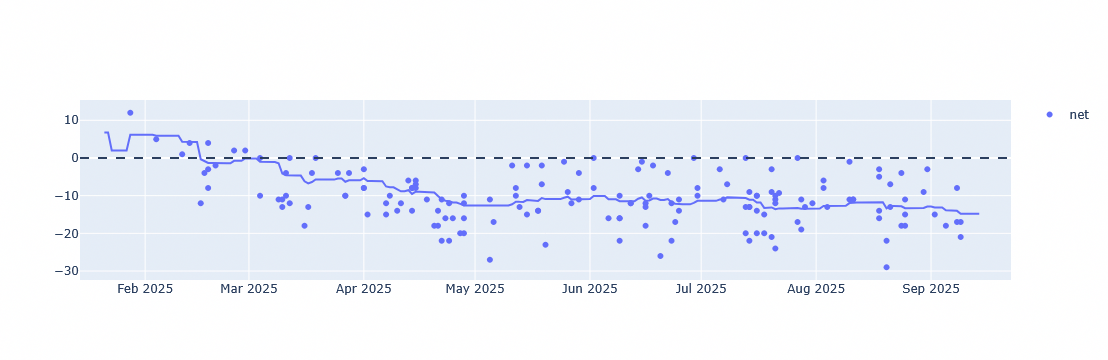

In [59]:
line = px.line(x=approval_avg_econ['Date'], y=approval_avg_econ['approve_mean'] - approval_avg_econ['disapprove_mean'])
scatter = px.scatter(polls_df_econ[polls_df_econ['end_date'] >= pd.to_datetime('2025-01-24')], x='end_date', y=['net'])
fig = go.Figure(data=line.data + scatter.data)
fig.add_hline(y=0, line_dash='dash')
fig.show()

In [60]:
def net_col(df: pd.DataFrame, min_date: datetime.date, issue_list: list):
#     df_copy = df.set_index(['Date'])
#     return df_copy['approve_mean'] - df_copy['disapprove_mean']
    date_range = pd.date_range(start=min_date, end=datetime.datetime.today(), freq='d', inclusive='both')
    data = df.copy()
    data['net_adj'] = data['approve_adj'] - data['disapprove_adj']
    net_averages = []
    net_stdevs = []
    issue_cols = {'Date': date_range, 'economy_avg':[], 'foreign_policy_avg':[], 'immigration_avg':[], 'inflation_avg':[],
                 'economy_std':[], 'foreign_policy_std':[], 'immigration_std':[], 'inflation_std':[], 'trade_tariffs_avg': [],
                 'trade_tariffs_std':[], 'healthcare_avg': [], 'healthcare_std': []}
    
    for issue in issue_list:
        for date in date_range:
    #         try:
            pipelined_df = avgs_pipeline(data, date, issue)
    #         except TypeError:
    #             print('TypeError')
    #             print(date)
            net_avg = np.sum(pipelined_df['net_adj'] * pipelined_df['total_weights'])
            net_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['net_adj'] - net_avg)**2))

            net_averages.append(net_avg)
            net_stdevs.append(net_std)

        issue_cols[f'{issue}_avg'].extend(net_averages)
        issue_cols[f'{issue}_std'].extend(net_stdevs)
        
        net_averages, net_stdevs = [], []
    
    # print(issue_cols)
    issue_df = pd.DataFrame(issue_cols).replace({0:2})
    
    for issue in ['economy', 'foreign_policy', 'immigration', 'inflation', 'trade_tariffs', 'healthcare']:
        issue_df[f'{issue}_upper_CI'] = issue_df[f'{issue}_avg'] + 1*issue_df[f'{issue}_std']
        issue_df[f'{issue}_lower_CI'] = issue_df[f'{issue}_avg'] - 1*issue_df[f'{issue}_std']
    
    return issue_df

In [61]:
net_issues = net_col(approval, datetime.date(2025, 1, 30), ['economy', 'foreign_policy', 'immigration', 'inflation', 'trade_tariffs', 'healthcare'])#.replace({0:2})
net_issues

Date  economy_avg  foreign_policy_avg  immigration_avg  \
0   2025-01-30     6.166676            2.774737         2.248780   
1   2025-01-31     6.165433            2.774737         2.249053   
2   2025-02-01     6.164277            2.774737         2.249288   
3   2025-02-02     6.163223            2.774737         2.249481   
4   2025-02-03     6.162287            2.774737         2.249624   
..         ...          ...                 ...              ...   
223 2025-09-10   -14.800172          -12.546606        -3.737248   
224 2025-09-11   -14.805418          -12.546777        -3.733596   
225 2025-09-12   -14.811345          -12.546812        -3.731770   
226 2025-09-13   -14.818172          -12.546693        -3.729751   
227 2025-09-14   -14.826067          -12.546399        -3.728442   

     inflation_avg  economy_std  foreign_policy_std  immigration_std  \
0         2.897090     5.674948            2.000000         3.351238   
1         2.895489     5.674739            2.000000         3.351564   
2         2.894035     5.674552            2.000000         3.351853   
3         2.892752     5.674389            2.000000         3.352099   
4         2.891664     5.674254            2.000000         3.352296   
..             ...          ...                 ...              ...   
223     -27.565961     4.965828            4.820897         4.896150   
224     -27.569254     4.965405            4.823657         4.895407   
225     -27.573733     4.964167            4.826795         4.893469   
226     -27.579146     4.962510            4.830354         4.891350   
227     -27.586034     4.960466            4.834381         4.889529   

     inflation_std  trade_tariffs_avg  ...  foreign_policy_upper_CI  \
0         5.409011           3.561424  ...                 4.774737   
1         5.409679           3.560043  ...                 4.774737   
2         5.410286           3.558820  ...                 4.774737   
3         5.410821           2.677167  ...                 4.774737   
4         5.411275           4.614390  ...                 4.774737   
..             ...                ...  ...                      ...   
223       4.969275         -16.151102  ...                -7.725709   
224       4.970692         -16.151027  ...                -7.723120   
225       4.970988         -16.153454  ...                -7.720017   
226       4.971190         -16.156874  ...                -7.716339   
227       4.971231         -16.163721  ...                -7.712019   

     foreign_policy_lower_CI  immigration_upper_CI  immigration_lower_CI  \
0                   0.774737              5.600018             -1.102458   
1                   0.774737              5.600617             -1.102511   
2                   0.774737              5.601142             -1.102565   
3                   0.774737              5.601579             -1.102618   
4                   0.774737              5.601919             -1.102672   
..                       ...                   ...                   ...   
223               -17.367503              1.158902             -8.633398   
224               -17.370434              1.161811             -8.629003   
225               -17.373607              1.161699             -8.625239   
226               -17.377047              1.161599             -8.621101   
227               -17.380780              1.161087             -8.617971   

     inflation_upper_CI  inflation_lower_CI  trade_tariffs_upper_CI  \
0              8.306100           -2.511921               10.582306   
1              8.305168           -2.514190               10.580384   
2              8.304321           -2.516251               10.578680   
3              8.303573           -2.518069                9.706503   
4              8.302938           -2.519611               11.106545   
..                  ...                 ...                     ...   
223          -22.596685          -32.535236               -8.0525

In [62]:
# net_issues, _ = approval_over_time(approval, datetime.date(2025, 1, 21), 'economy')

In [63]:
# econ_net = net_col(approval_avg_econ)
# fp_net = net_col(approval_avg_fp)
# imm_net = net_col(approval_avg_imm)
# infl_net = net_col(approval_avg_infl)

# net_issues = pd.concat([econ_net, fp_net, imm_net, infl_net], axis='columns').rename({
#     0:'economy', 1:'foreign_policy', 2:'immigration', 3:'inflation'
# }, axis='columns').reset_index()
# net_issues

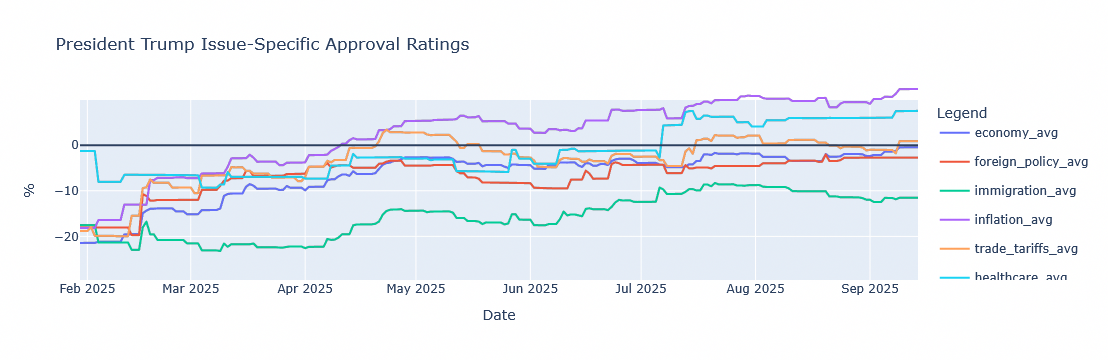

In [64]:
line = px.line(net_issues, x='Date', y=['economy_avg', 'foreign_policy_avg', 'immigration_avg', 'inflation_avg', 'trade_tariffs_avg', 'healthcare_avg'])
line.update_traces(hovertemplate=None)
line.update_layout(hovermode='x unified')
fig = go.Figure(data=line.data)
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings',
    xaxis_title='Date',
    yaxis_title='%',
    legend_title='Legend',
    hovermode='x unified'
)
fig.add_hline(0)
fig.show()

In [65]:
net_issues.to_csv('net_approval_issues.csv')

In [66]:
def current_approval(data: pd.DataFrame, issue: str):
    yes_averages = []
    no_averages = []
    yes_stdevs = []
    no_stdevs = []
    issue_col = []
    date = datetime.datetime.today()
#         try:
    pipelined_df = avgs_pipeline(data, date, issue)
#         except TypeError:
#             print('TypeError')
#             print(date)
    yes_avg = np.sum(pipelined_df['approve_adj'] * pipelined_df['total_weights'])
    no_avg = np.sum(pipelined_df['disapprove_adj'] * pipelined_df['total_weights'])
    yes_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['approve_adj'] - yes_avg)**2))
    no_std = np.sqrt(np.sum(pipelined_df['total_weights'] * (pipelined_df['disapprove_adj'] - no_avg)**2))
    
    return {'issue': issue, 'approve': yes_avg, 'disapprove': no_avg, 'approve_std': yes_std, 'disapprove_std': no_std}

In [67]:
all_issues = np.unique(approval['issue'])
all_issues

array(['abortion', 'ai', 'border_security', 'cabinet', 'canada',
       'childcare', 'china', 'civil_liberties', 'civil_rights',
       'climate_change', 'consumer_protection', 'corruption', 'crime',
       'criminal_justice', 'cryptocurrency', 'cybersecurity',
       'dc_takeover', 'death_penalty', 'dei', 'democracy',
       'deploying_military_us_cities', 'deportations', 'disaster_relief',
       'doge', 'economy', 'education', 'energy', 'environment',
       'epstein_files', 'executive_orders', 'federal_workforce',
       'flooding_recent', 'foreign_aid', 'foreign_policy', 'free_speech',
       'gas_prices', 'govt_management', 'govt_spending', 'guns',
       'healthcare', 'housing', 'immigration', 'inflation', 'iran',
       'israel', 'israel_iran_conflict', 'israel_palestine',
       'jan_6_handling', 'jobs', 'judiciary_politicization',
       'kilmar_abrego_garcia', 'lgbtq', 'medicaire_medicaid',
       'middle_east', 'military', 'national_debt', 'national_politics',
       'natio

In [68]:
approval['issue'].value_counts()[:15]

issue
economy             166
immigration         150
trade_tariffs       122
inflation            95
foreign_policy       69
healthcare           37
ukraine              31
crime                29
education            25
govt_spending        24
israel_palestine     16
taxes                16
civil_rights         15
deportations         15
climate_change       14
Name: count, dtype: int64

In [69]:
all_issues_approval = pd.DataFrame()

for issue in all_issues:
    row = current_approval(approval, issue)
    all_issues_approval = pd.concat([all_issues_approval, pd.DataFrame(row, index=[0])], axis=0)

In [70]:
all_issues_approval['net'] = all_issues_approval['approve'] - all_issues_approval['disapprove']
all_issues_approval = all_issues_approval.sort_values(['net'], ascending=False)
all_issues_approval = all_issues_approval.reset_index().drop(['index'], axis=1)

In [71]:
all_issues_approval

issue    approve  disapprove  approve_std  disapprove_std  \
0     border_security  55.143798   44.518352     3.691341        3.568170   
1         transgender  42.257841   41.754693     0.285431        0.147999   
2   national_security  44.319303   46.066601     2.098926        1.294991   
3               crime  46.078942   48.683334     3.269853        3.323472   
4    criminal_justice  39.411177   42.130303     0.715821        1.064834   
..                ...        ...         ...          ...             ...   
71            pardons  27.249587   54.750413     0.000000        0.000000   
72          inflation  34.070202   61.656235     2.684231        3.142604   
73       stock_market  31.387369   66.612632     0.000000        0.000000   
74              unity  31.490610   68.501790     0.121226        0.431577   
75      epstein_files  23.847235   64.330795     3.956571        6.571212   

          net  
0   10.625446  
1    0.503148  
2   -1.747298  
3   -2.604392  
4   -2.719126  
..        ...  
71 -27.500826  
72 -27.586034  
73 -35.225263  
74 -37.011180  
75 -40.483560  

[76 rows x 6 columns]

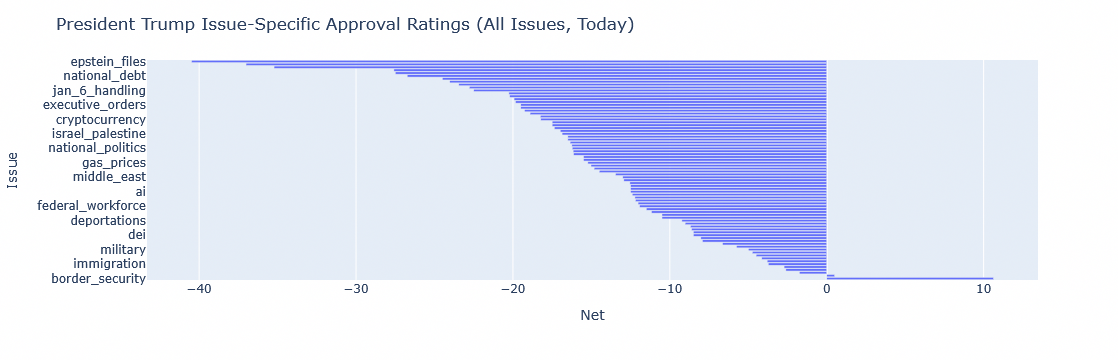

In [72]:
fig = px.bar(all_issues_approval, x='net', y='issue')
fig.update_layout(
    title='President Trump Issue-Specific Approval Ratings (All Issues, Today)',
    xaxis_title='Net',
    yaxis_title='Issue',
    legend_title='Legend',
)
fig.show()